In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os, glob
import matplotlib.pyplot as plt

def img_aug(file_ends = [".jpg",".jpeg", ".png"],
            save_format = 'jpeg',
            img_count = 1,
            verbose = 1,
            root_dir = "data_augment/",
            save_dir = "control/"):
    
    # image generator
    datagen = ImageDataGenerator(rotation_range=30,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2, 
                                 #shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=False,
                                 fill_mode='constant')

    # list of content in root_dir
    dir_list = os.listdir(path = root_dir)

    # creating list of classes
    class_list = []
    
    for file in dir_list:
        if file.endswith("_class"):
            class_list.append(file)

    # debug (verbose 1)
    if verbose == 2:
        print("class_list contain: {}".format(class_list))
    
    # processing each class_folder in class_list
    for class_folder in class_list:
        
        # path to resulting folder for image
        folder_path=root_dir+save_dir+ class_folder + "/"
        
        if not os.path.exists(root_dir+save_dir):
            os.mkdir(os.path.join(root_dir+save_dir))
        
        # list of images in class folder
        dir_list = os.listdir(path = root_dir + class_folder)
        img_list = []
        for file in dir_list:
            for end in file_ends:
                if file.endswith(end):
                    img_list.append(file)
        
        # debug (verbose 1)
        if verbose == 2:
            print(img_list)
            
        # processing each image in img_list
        for img in img_list:
            x = load_img(root_dir + class_folder + "/" + img)
            x = x.resize((300,300))
            x = img_to_array(x)  # this is a Numpy array with shape (3, ~ , ~)
            x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, ~ , ~ )
            
            # check folder path
            if not os.path.exists(folder_path):
                os.mkdir(os.path.join(folder_path))
            
            # the .flow() command below generates batches of randomly transformed images
            # and saves the results to the `folder_path` directory
            i = 0
            for batch in datagen.flow(x, batch_size=1,
                                      save_to_dir=folder_path, 
                                      save_prefix= img[:-4] , 
                                      save_format=save_format):
                if verbose == 2:
                    print(i)
                i += 1
                if i > img_count:
                    break  # otherwise the generator would loop indefinitely
        if verbose == 1:
            print("{} augment done.".format(class_folder))

            
def print_plt(history = None):
    # построить график изменения верности
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # построить график изменения потери
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def img_pred(file_end=[".jpeg", ".png", "jpg"], path_pred="npi_aug/", class_list = None):
    if class_list == None:
        print("class_list = None")
    else:
        list_file = os.listdir(path_pred)
        list_img = []
        for file in list_file:
            for end in file_end:
                if file.endswith(end):
                    list_img.append(file)
        for file in list_img:       
            img = load_img(path_pred + file)  # this is a PIL image
            img = img.resize((300,300))
            x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
            x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
            x = x/255
            h = model.predict_classes(x) 
            z = model.predict(x)
            #print(str(class_[h[0]]) + " {:.4f} {:.4f} {:.4f}".format(z[0][0], z[0][1], z[0][2]))
            print(file + " " + str(class_[h[0]]) + " {:.2f}%".format(z[0][h[0]]*100))
            #print(z)
            #print((z[0][0]))

In [38]:
img_aug(img_count = 100,
        verbose = 1,
        root_dir = "npi_aug/",
        save_dir = "result/")

sitnikov_class augment done.
krotov_class augment done.
yakovenko_class augment done.
Oleg_class augment done.
misha_class augment done.
natasha_class augment done.


In [39]:
img_aug(img_count = 100,
        verbose = 1,
        root_dir = "npi_aug/for_test/",
        save_dir = "result/")

sitnikov_class augment done.
krotov_class augment done.
yakovenko_class augment done.
Oleg_class augment done.
misha_class augment done.
natasha_class augment done.


In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
import os, glob
import matplotlib.pyplot as plt

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'npi_aug/result',
        target_size=(300, 300),
        batch_size=30,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        'npi_aug/for_test/result',
        target_size=(300, 300),
        batch_size=30,
        class_mode='categorical')


Found 1811 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


Epoch 1/15
30/30 [==============================] - 7s 224ms/step - loss: 12.7512 - acc: 0.1767 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 2/15
30/30 [==============================] - 5s 165ms/step - loss: 12.6321 - acc: 0.1809 - val_loss: 7.8951 - val_acc: 0.1667
Epoch 3/15
30/30 [==============================] - 5s 169ms/step - loss: 4.6189 - acc: 0.2389 - val_loss: 1.8089 - val_acc: 0.2111
Epoch 4/15
30/30 [==============================] - 5s 163ms/step - loss: 1.7437 - acc: 0.2813 - val_loss: 1.7973 - val_acc: 0.2111
Epoch 5/15
30/30 [==============================] - 5s 168ms/step - loss: 1.6011 - acc: 0.3388 - val_loss: 1.9170 - val_acc: 0.2222
Epoch 6/15
30/30 [==============================] - 5s 170ms/step - loss: 1.4643 - acc: 0.3956 - val_loss: 2.1268 - val_acc: 0.2778
Epoch 7/15
30/30 [==============================] - 5s 173ms/step - loss: 1.2947 - acc: 0.4644 - val_loss: 2.3216 - val_acc: 0.3111
Epoch 8/15
30/30 [==============================] - 5s 175ms/step - loss:

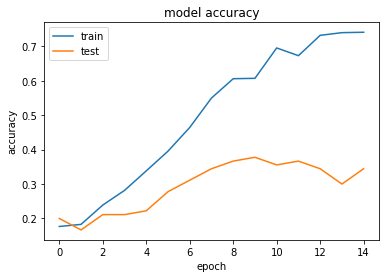

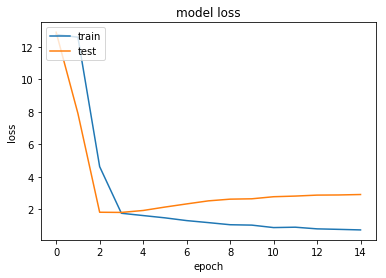

In [7]:
from tensorflow.python.keras import optimizers

class_ = [["oleg_class"], ["krotov_class"], ["misha_class"],
          ["natasha_class"], ["sitnikov_class"], ["yakovenko_class"]]

Adam = optimizers.Adam(lr=0.01,
                       beta_1=0.9,
                       beta_2=0.999,
                       epsilon=None,
                       decay=0.5,
                       amsgrad=True)



model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))



# model.add(Conv2D(600, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(80))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam,
              metrics=['acc'])


history = model.fit_generator(train_generator,
                              steps_per_epoch=1800/60,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=3)
print_plt(history = history)




In [8]:
img_pred(path_pred = "npi_aug/for_test/",
         class_list = class_)

natasha_t2.jpg ['krotov_class'] 89.14%
kr1.jpeg ['misha_class'] 99.89%
natasha_t1.jpg ['misha_class'] 55.52%
kr2.jpeg ['krotov_class'] 69.43%
sit2.jpg ['krotov_class'] 90.40%
ya2.jpg ['krotov_class'] 44.36%
mish2.jpg ['misha_class'] 76.89%
mish.jpg ['misha_class'] 63.15%
ya1.jpg ['krotov_class'] 73.04%
ol2.jpg ['krotov_class'] 65.91%
ol1.jpg ['yakovenko_class'] 26.53%
sit1.jpg ['sitnikov_class'] 33.13%


In [34]:
img_pred()

a4gKUB9Q1VE.jpg ['misha_class'] 91.35%
natasha_t1.jpg ['oleg_class'] 91.57%
ZlQ8Jq7Vky0.jpg ['misha_class'] 76.04%
mish2.jpg ['misha_class'] 100.00%
mish.jpg ['misha_class'] 98.57%
2.png ['natasha_class'] 99.99%
3.png ['sitnikov_class'] 100.00%
sit1.jpg ['sitnikov_class'] 100.00%


In [36]:
img_pred()

a4gKUB9Q1VE.jpg ['oleg_class'] 67.77%
natasha_t1.jpg ['oleg_class'] 97.37%
ZlQ8Jq7Vky0.jpg ['oleg_class'] 91.38%
mish2.jpg ['misha_class'] 90.65%
mish.jpg ['misha_class'] 99.92%
2.png ['natasha_class'] 100.00%
3.png ['sitnikov_class'] 100.00%
sit1.jpg ['oleg_class'] 99.97%


In [39]:
img_pred()

a4gKUB9Q1VE.jpg ['sitnikov_class'] 79.39%
natasha_t1.jpg ['sitnikov_class'] 99.00%
ZlQ8Jq7Vky0.jpg ['misha_class'] 99.11%
mish2.jpg ['misha_class'] 99.91%
mish.jpg ['misha_class'] 99.11%
2.png ['natasha_class'] 99.97%
3.png ['sitnikov_class'] 100.00%
sit1.jpg ['sitnikov_class'] 78.10%


In [6]:
img_pred()

a4gKUB9Q1VE.jpg ['oleg_class'] 99.98%
natasha_t1.jpg ['oleg_class'] 99.85%
ZlQ8Jq7Vky0.jpg ['misha_class'] 81.80%
mish2.jpg ['oleg_class'] 52.64%
mish.jpg ['misha_class'] 100.00%
2.png ['natasha_class'] 99.90%
3.png ['sitnikov_class'] 100.00%
sit1.jpg ['oleg_class'] 88.20%


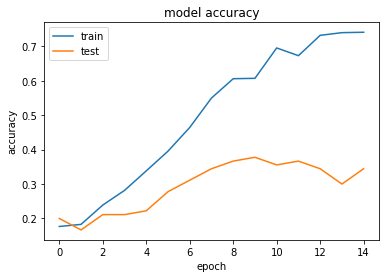

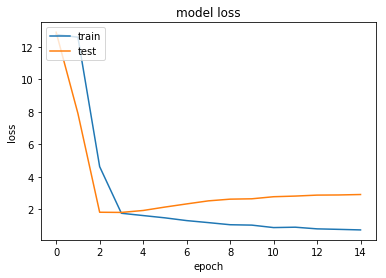

In [9]:
print_plt(history = history)